In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
len(x_train)

60000

In [ ]:
len(x_test)

10000

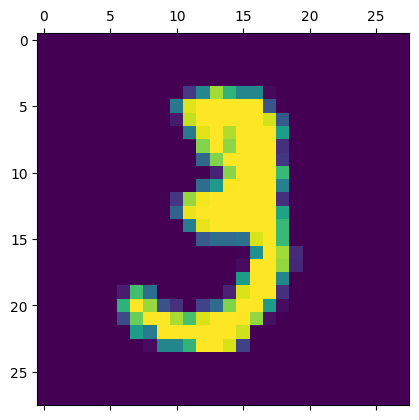

In [ ]:
plt.matshow(x_train[10])

In [ ]:
y_train[10]

3

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
#x_train=x_train/255
x_test=x_test/255

In [ ]:
#x_train_flatten=x_train.reshape(len(x_train),28*28)
x_test_flatten=x_test.reshape(len(x_test),28*28)

In [ ]:
x_test_flatten.shape

(10000, 784)

In [ ]:
model = keras.Sequential([
     keras.layers.Flatten(input_shape=(28,28)),
     keras.layers.Dense(100,input_shape=(784,),activation='relu'),
     keras.layers.Dense(10,activation='sigmoid')
     ])

model.compile(
    optimizer='Adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train, y_train, epochs=10 ,batch_size=2)

Epoch 1/10
30000/30000 [==============================] - 101s 3ms/step - loss: 1.3813 - accuracy: 0.7878
Epoch 2/10
30000/30000 [==============================] - 87s 3ms/step - loss: 0.7063 - accuracy: 0.8503
Epoch 3/10
30000/30000 [==============================] - 91s 3ms/step - loss: 0.7301 - accuracy: 0.8541
Epoch 4/10
30000/30000 [==============================] - 91s 3ms/step - loss: 0.6928 - accuracy: 0.8619
Epoch 5/10
30000/30000 [==============================] - 86s 3ms/step - loss: 0.7166 - accuracy: 0.8605
Epoch 6/10
30000/30000 [==============================] - 94s 3ms/step - loss: 0.7009 - accuracy: 0.8639
Epoch 7/10
30000/30000 [==============================] - 81s 3ms/step - loss: 0.7044 - accuracy: 0.8590
Epoch 8/10
30000/30000 [==============================] - 77s 3ms/step - loss: 0.6944 - accuracy: 0.8648
Epoch 9/10
30000/30000 [==============================] - 78s 3ms/step - loss: 0.7017 - accuracy: 0.8615
Epoch 10/10
30000/30000 [=============================

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.4124 - accuracy: 0.1119


[2.4124033451080322, 0.11190000176429749]

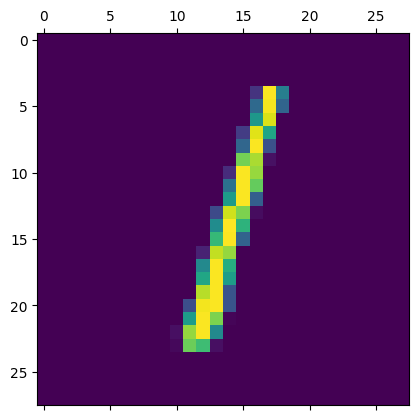

In [ ]:
plt.matshow(x_test[2])

In [ ]:
y_pred=model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pred[2]

array([0.0400273 , 0.05373961, 0.12182957, 0.11276971, 0.06596194,
       0.0843316 , 0.08076002, 0.06236132, 0.4537414 , 0.09426739],
      dtype=float32)

In [ ]:
np.argmax(y_pred[2])

8

In [ ]:
y_pred_labels=[np.argmax(i)for i in y_pred]
y_pred_labels[2]

8

In [ ]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[   3,    0,   34,    0,    0,   11,    0,    0,  932,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1135,    0],
       [   0,    0,   24,    0,    0,    0,    0,    0, 1008,    0],
       [   0,    0,    1,    4,    0,    0,    0,    0, 1005,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,  982,    0],
       [   0,    0,    0,    3,    0,    0,    0,    0,  889,    0],
       [   0,    0,    6,    0,    0,    0,    0,    0,  952,    0],
       [   0,    0,  291,    1,    0,   20,    0,  114,  508,   94],
       [   0,    0,    0,    0,    0,    0,    0,    0,  974,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1009,    0]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'real')

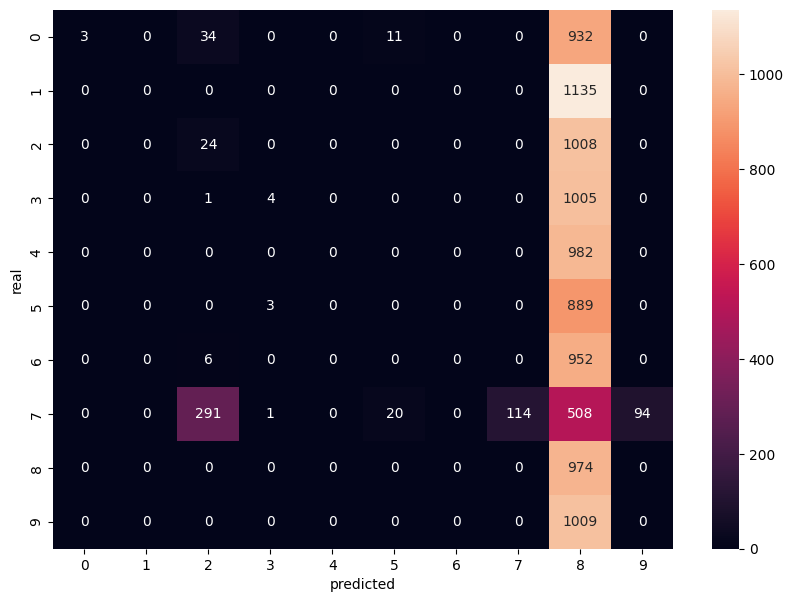

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('real')